In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.16.2
3.7.0


In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print("Трейн:", x_train.shape, y_train.shape)
print("Тест:", x_test.shape, y_test.shape)

Трейн: (50000, 32, 32, 3) (50000, 1)
Тест: (10000, 32, 32, 3) (10000, 1)


In [4]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

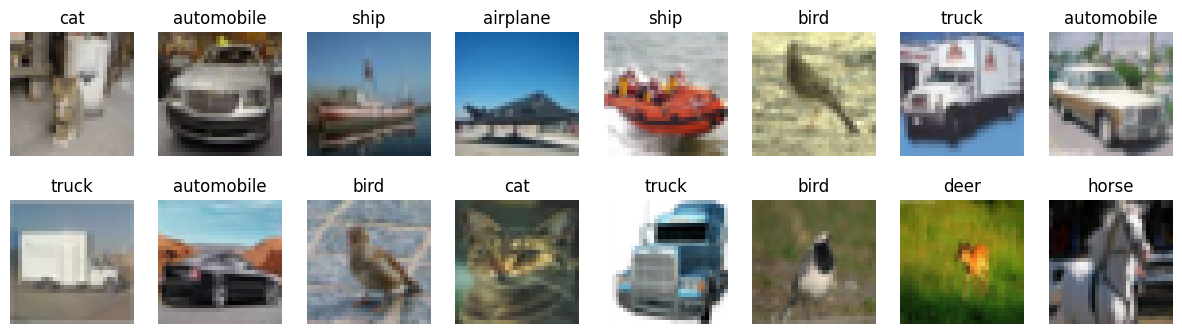

In [5]:
# посмотрим на примеры картинок
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [6]:
# нормализуем входы
x_train2 = x_train.astype('float32') / 255 - 0.5
x_test2 = x_test.astype('float32') / 255 - 0.5

# конвертируем метки в np.array (?, NUM_CLASSES)
y_train2 = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [7]:
# слои, которые нам пригодятся
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [8]:
def make_default_model():
    model = Sequential()
    
    # Первый сверточный блок
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Второй сверточный блок
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
    model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Преобразование в вектор
    model.add(Flatten())
    
    # Полносвязные слои
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    
    return model

In [9]:
K.clear_session()
model = make_default_model()
model.summary()

/Users/apple/python/SkillFactory/Ml_learning/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-14 00:10:48.276721: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-02-14 00:10:48.276744: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-14 00:10:48.276757: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-02-14 00:10:48.276941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-14 00:10:48.276955: I tensorflow/core/common_runtime/pluggable_device/plu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,234 (4.14 MB)

 Trainable params: 1,084,234 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
def train_model(make_model_func=make_default_model, optimizer="adam"):
  BATCH_SIZE = 32
  EPOCHS = 10

  K.clear_session()
  model = make_model_func()

  model.compile(
      loss='categorical_crossentropy',
      optimizer=optimizer,
      metrics=['accuracy']
  )

  model.fit(
      x_train2, y_train2,  # нормализованные данные
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      validation_data=(x_test2, y_test2),
      shuffle=False
  )
  
  return model

In [11]:
train_model()

Epoch 1/10


2025-02-14 00:11:06.538091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.3753 - loss: 1.7008 - val_accuracy: 0.6041 - val_loss: 1.1100
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5743 - loss: 1.2276 - val_accuracy: 0.6463 - val_loss: 0.9936
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5869 - loss: 1.2658 - val_accuracy: 0.6116 - val_loss: 1.2476
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5640 - loss: 1.6397 - val_accuracy: 0.6241 - val_loss: 1.6953
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5463 - loss: 2.7520 - val_accuracy: 0.6539 - val_loss: 2.9457
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5381 - loss: 6.5863 - val_accuracy: 0.6376 - val_loss: 9.7148
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5514 - loss: 16.9486 - val_accuracy: 0.6427 - val_loss: 23.4414
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5557 - loss: 40

<Sequential name=sequential, built=True>

In [12]:
def make_sigmoid_model():
    model = Sequential()
    
    # Первый сверточный блок
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Второй сверточный блок
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
    model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Преобразование в вектор
    model.add(Flatten())
    
    # Полносвязные слои
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="sigmoid"))
    
    return model

In [13]:
# учим sigmoid
train_model(make_sigmoid_model)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.3469 - loss: 1.7730 - val_accuracy: 0.5835 - val_loss: 1.1500
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5436 - loss: 1.2967 - val_accuracy: 0.6122 - val_loss: 1.1081
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5639 - loss: 1.3373 - val_accuracy: 0.6073 - val_loss: 1.2197
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5525 - loss: 1.6827 - val_accuracy: 0.6427 - val_loss: 1.3748
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5370 - loss: 2.8151 - val_accuracy: 0.6445 - val_loss: 2.4716
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5401 - loss: 6.6370 - val_accuracy: 0.6060 - val_loss: 10.5732
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5452 - loss: 18.5150 - val_accuracy: 0.6588 - val_loss: 19.9855
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.554

<Sequential name=sequential, built=True>

In [14]:
# учим sgd
train_model(optimizer="sgd")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.1876 - loss: 2.1663 - val_accuracy: 0.3789 - val_loss: 1.7536
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.3487 - loss: 1.7951 - val_accuracy: 0.4395 - val_loss: 1.5589
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3945 - loss: 1.6698 - val_accuracy: 0.4614 - val_loss: 1.4846
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4232 - loss: 1.5934 - val_accuracy: 0.4778 - val_loss: 1.4524
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4427 - loss: 1.5419 - val_accuracy: 0.4800 - val_loss: 1.4464
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4546 - loss: 1.5157 - val_accuracy: 0.4886 - val_loss: 1.4050
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4544 - loss: 1.5213 - val_accuracy: 0.4032 - val_loss: 1.7903
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4458 -

<Sequential name=sequential, built=True>

In [15]:
def make_batchnorm_sigmoid_model():
    model = make_batchnorm_model()
    model.layers[-1].activation = 'sigmoid'  # Изменение последнего слоя на sigmoid
    return model


In [17]:
# учим bn
train_model(make_batchnorm_sigmoid_model)

NameError: name 'make_batchnorm_model' is not defined

In [18]:
def make_bn_model():
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    
    return model

In [19]:
train_model(make_bn_model)

/Users/apple/python/SkillFactory/Ml_learning/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.4100 - loss: 1.8634 - val_accuracy: 0.6341 - val_loss: 1.0098
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6298 - loss: 1.0513 - val_accuracy: 0.6824 - val_loss: 0.8982
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.6805 - loss: 0.9082 - val_accuracy: 0.7170 - val_loss: 0.8028
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7136 - loss: 0.8338 - val_accuracy: 0.7306 - val_loss: 0.7763
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7324 - loss: 0.7727 - val_accuracy: 0.7498 - val_loss: 0.7221
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7498 - loss: 0.7262 - val_accuracy: 0.7637 - val_loss: 0.6852
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7592 - loss: 0.6902 - val_accuracy: 0.7724 - val_loss: 0.6683
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7699 -

<Sequential name=sequential, built=True>